In [43]:
%matplotlib inline

def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [27]:
path='/media/machine_learning/A80C461E0C45E7C01/dogs'

In [7]:
from __future__ import  division, print_function
import os , json 
from glob import  glob
import  numpy as np
np.set_printoptions(precision=4,linewidth=100)
from matplotlib import pyplot as plt

In [16]:
import theano

In [18]:
import   keras

Using Theano backend.


In [19]:
from keras.preprocessing import image


In [36]:
vgg_mean = np.array([123.68, 116.779, 103.939], dtype=np.float32).reshape((3,1,1))
def vgg_preprocess(x):
    x = x - vgg_mean
    return x[:, ::-1] # reverse axis rgb->bgr

class KineticNNet():
    def __init__(self,path):
        self.path=path
    def get_batches(self,path, gen=image.ImageDataGenerator(), shuffle=True, batch_size=4,class_mode='categorical'):
        return gen.flow_from_directory(path,target_size=(224,224),
                                     class_mode=class_mode,shuffle=shuffle,batch_size=batch_size)
        def __init__(self):
        self.FILE_PATH = 'http://www.platform.ai/models/'
        self.create()
        self.get_classes()


    def get_classes(self):
        fname = 'imagenet_class_index.json'
        fpath = get_file(fname, self.FILE_PATH+fname, cache_subdir='models')
        with open(fpath) as f:
            class_dict = json.load(f)
        self.classes = [class_dict[str(i)][1] for i in range(len(class_dict))]

In [37]:
K=KineticNNet('/media/machine_learning/A80C461E0C45E7C01/dogs')

In [40]:
batches=K.get_batches(path, batch_size=4)

Found 25000 images belonging to 1 classes.


In [41]:
imgs,labels=next(batches)

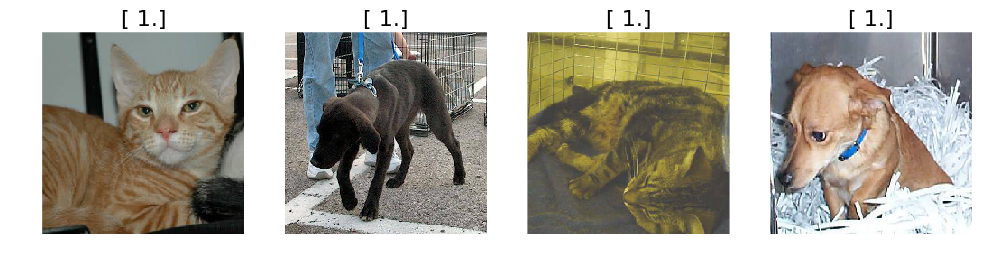

In [45]:
plots(imgs,titles=labels)

In [46]:
path='/media/machine_learning/A80C461E0C45E7C01/leiden/train/train'

In [48]:
k=KineticNNet(path)

In [52]:
batches=K.get_batches(path, batch_size=2)

Found 3777 images belonging to 8 classes.


In [53]:
imgs,labels=next(batches)

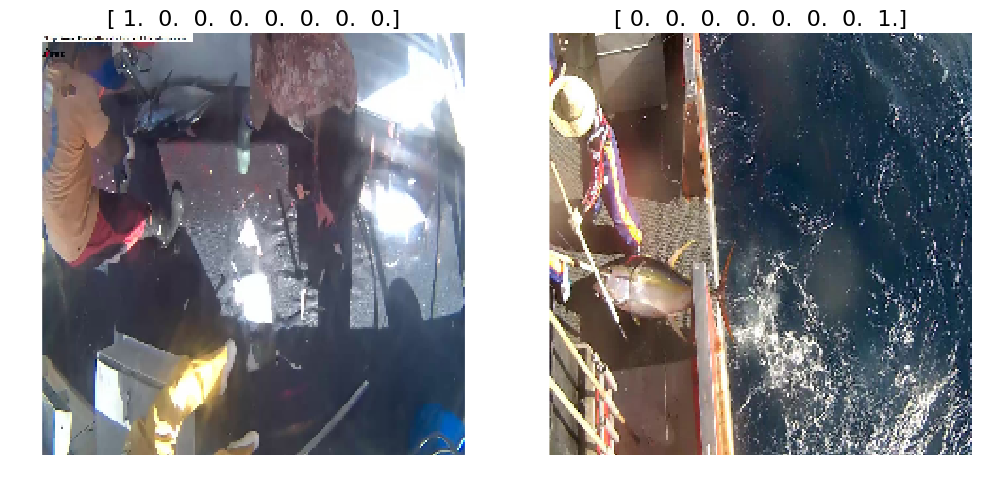

In [54]:
plots(imgs,titles=labels)

In [55]:
path = "data/dogscats/"
#path = "data/dogscats/sample/"

In [56]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [65]:
import utils; 
from utils import plots

In [66]:
batch_size=64

In [69]:
import vgg16
from vgg16 import Vgg16

In [71]:
vgg = Vgg16()
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

 32391168/553482496 [>.............................] - ETA: 341s

OSError: [Errno 28] No space left on device